# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [156]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [157]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [158]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [325, 95, 300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

print "Chosen samples Mean normalized:"
display( ( (samples - data.mean()) /data.std() ).round() )
print "Data broken into quintiles:"
display(data.quantile([0.25,0.5,0.75,1.0]).round())

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,32717,16784,13626,60869,1272,5609
1,3,2920,6252,440,223,709
2,16448,6243,6360,824,2662,2005


Chosen samples Mean normalized:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2.0,1.0,1.0,12.0,-0.0,1.0
1,-1.0,-0.0,-0.0,-1.0,-1.0,-0.0
2,0.0,0.0,-0.0,-0.0,-0.0,0.0


Data broken into quintiles:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0.25,3128.0,1533.0,2153.0,742.0,257.0,408.0
0.50,8504.0,3627.0,4756.0,1526.0,816.0,966.0
0.75,16934.0,7190.0,10656.0,3554.0,3922.0,1820.0
1.00,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The first customer looks like a big establishment, probably some kind of a sub-distributor (notice that their 'Frozen' is the highest amongst the data we have). The second customer is a very small scale operation. Probably a hole in the wall kind of esatblishment (notice that their 'Fresh' is the highest amongst the data we have). Finally the last one is a medium size establistment that buys almost nothing frozen.

To provide additional color to these three samples we have  cacluated two other quanities in the second and third tables above. In the second table we have (x - u)/σ and in the third table we have divinded the data in quintiles.

First Sample: From the second table we see that the first sample is at least larger than one σ from the mean on most features and is twelve σ larger than the mean on grocery. In other words it is a large customer compared to the average customer in the data. This is confirmed from the third table which shows that this cutomer is in the 75 to 100% percentile for most features.

Second Sample: The second table for this shoes that the sample is one σ below the mean for most features and is closer to the 25% percentile range according to the third table. The two tables agree for this sample point.


Third Sample: We see from the second table that the third sample is right around the mean for each feature. However the third table shows that the sample falls in the 50 to 75% percentile range and most of it is closer to the 75% point. ** This shows us that the data is very right skewed with a few very large data points. This pulls the mean higher and so points that are actually closer to the 75% percentile end up being closer to the mean. **

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [159]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

List_Cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

score = dict()

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)    

for col_to_drop in List_Cols:
        
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([col_to_drop], axis = 1, inplace = False)

# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[col_to_drop], test_size=0.25, random_state=42)

    regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
    score[col_to_drop] = regressor.score(X_test, y_test)
    
print score

{'Grocery': 0.69924819667537985, 'Frozen': -0.27824914882385121, 'Delicatessen': -11.023627900466764, 'Detergents_Paper': 0.34877745469093757, 'Fresh': -0.33307053360466754, 'Milk': 0.17343800937900888}


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** From the answers printed it looks like 'Grocery' is the column that can be best predicted from the remaining columns since it is closest to 1. We also notice than the 'Fresh', 'Frozen' and 'Delicatessen' (especially Delicatessen) have a negative R^2. Thus those three cannot be predicted from the other columns and hence need to be kept in any data we use.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115dc3250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115bb9b90>]], dtype=object)

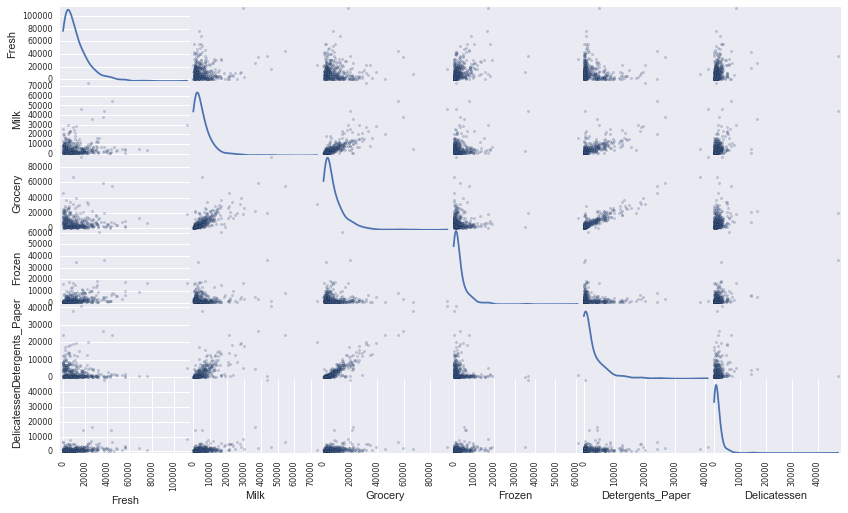

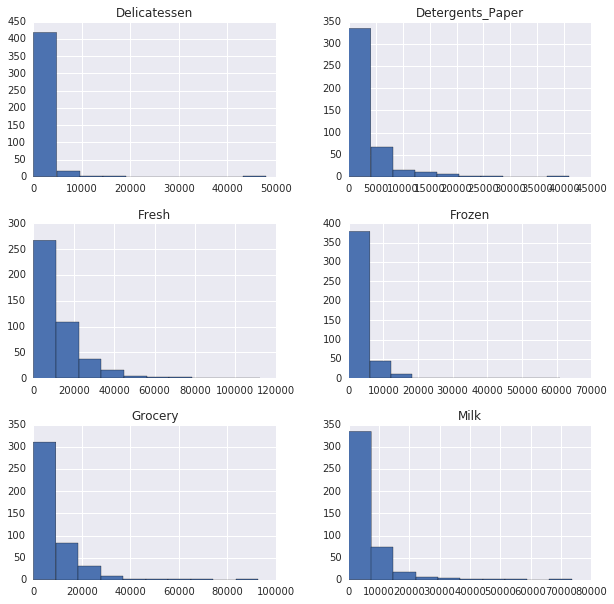

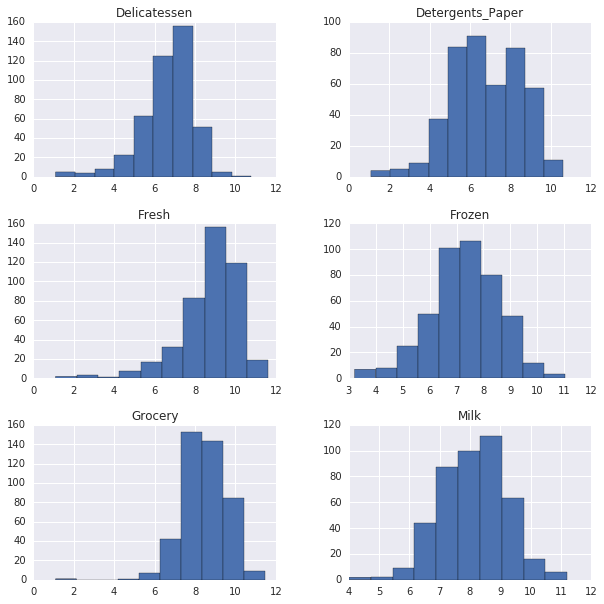

In [160]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.hist(figsize=(10,10), bins=10)

# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

log_data.hist(figsize=(10,10), bins=10)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** 'Grocery' shows strong correlation with 'Milk' and 'Detergents_Paper'. Similarly 'Milk' shows some correlation with Detergents_Paper'. The scatter matrix confirms what the regressor scores showed above.

As seen from the histograms for each of the features, the data is very highly right skewed. We see a large number of datapoints in the smaller bins and very few data points in the larger bins. The small number of datapoints with very large values pulls the mean higher closer to 75% percentile. Plotting the histograms of the log of the data we get distributions that are closer to a normal distribution.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

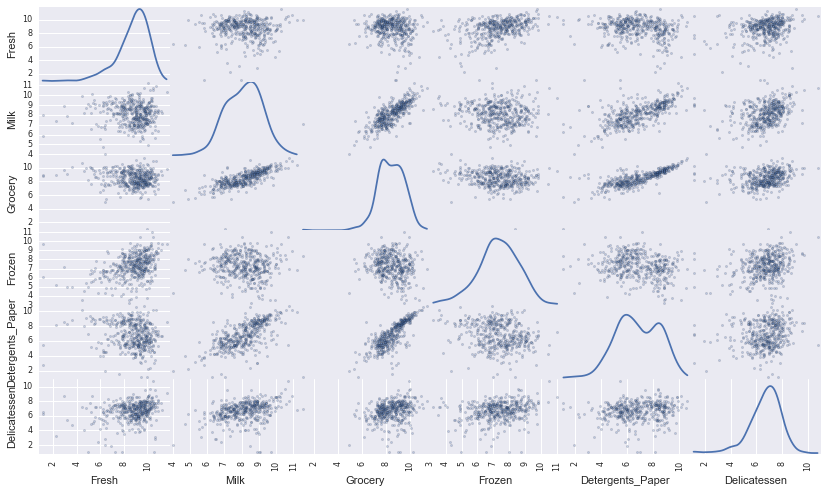

In [161]:
# TODO: Scale the data using the natural logarithm
#log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [162]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
1,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [163]:

outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers = outliers + log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()


import collections
print "The following indices are common amongst all the features:",
print [item for item, count in collections.Counter(outliers).items() if count > 1]
    
    
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print "After removing outliers the dataset has {} samples with {} features each.".format(*good_data.shape)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


The following indices are common amongst all the features: [128, 154, 65, 66, 75]
After removing outliers the dataset has 398 samples with 6 features each.


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes. The following indices are outliers for more than one feature: [128, 154, 65, 66, 75]. I have removed all the indices considered outliers per Tukey's definition. The new dataset still has 398 samples so still adeqaute for data analysis (i.e 42 samples were removed as outliers)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

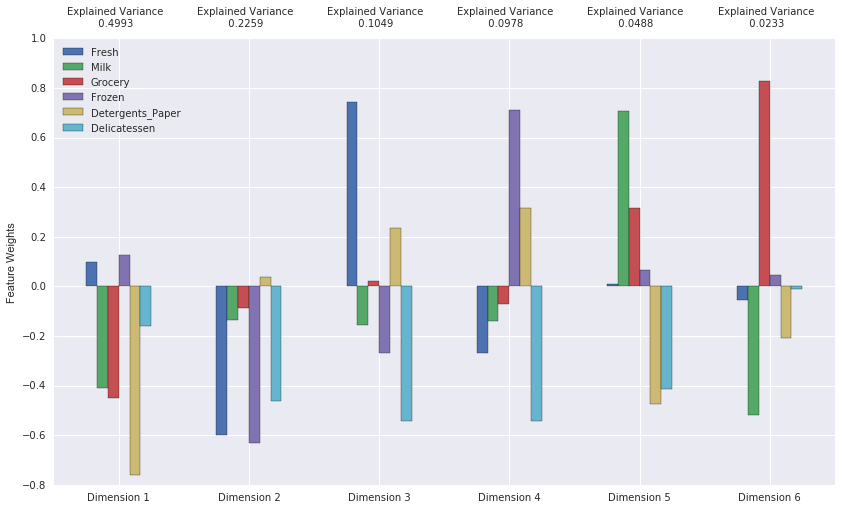

In [164]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)


# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)


# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first two components provide with 0.7252 (72.52 %) explanation for the variance in the data. The first four components provide with 0.9279 (92.79%) explanation for the variance in the data. The first four components/dimensions are a mixture of the six spending categories and hence need to be written as an expression.

The other way to think of this is if the original data had six dimenions along the six categories 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', then the PCA basially rotated and shifted the axes in the 6 dimensional space such that the new axes now have to be defined in terms of the 6 original axes. Further the new axes are defined in terms of decreasing order of variance in the original data points. Thus:



** First Component  =   0.09'Fresh' -0.4'Milk' -0.42'Grocery' +0.1'Frozen' -0.78'Detergents_Paper' -0.1'Delicatessen' **

** ↑ ** This axis represents an establishment that buys a lot of 'Milk', 'Grocery' and 'Detergents_Paper'. A supermarket probably can be represented here though they also likely buy a lot of other stuff and hence will be probably represented off-axis.

**Second Component =   -0.6'Fresh' -0.1'Milk' -0.08'Grocery' -0.62'Frozen' +0.01'Detergents_Paper' -0.5'Delicatessen' **

** ↑ **  This axis represents a restaurant since it buys a lot of 'Fresh', 'Frozen'and 'Delicatessen'.

** Third Component  =   0.7'Fresh'  -0.1'Milk' +0.01'Grocery' -0.3'Frozen' +0.2'Detergents_Paper' -0.58'Delicatessen' **

** ↑ ** This axis either represents a Deli or a vegan restaurant (opposite directions) since in one direction 'Delicatessen'is large and in the other direction 'Fresh' is large.

** Fourth Component =   -0.3'Fresh' -0.18'Milk' -0.05'Grocery' +0.7'Frozen' +0.3'Detergents_Paper'-0.58'Delicatessen' **

** Note: The magnitude to each component is given by the feature weight and the direction is given by the sign. So for example for the first dimension we can infer that 'Milk', 'Grocery' and 'Detergents_Paper' exhibit the maximum variance in the original data and hence get the largest weight in the first dimension. Also note that the signs of the coefficent are important w.r.t to each other and not in absolute sense i.e we could reverse all the signs in the first dimension and it would still be a valid first component (just in the opposite direction to the original first component). The more important thing to note is that the signs show that as customers buy more 'Detergents_Paper' they end up buying slightly less 'Fresh', and 'Frozen' **



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [165]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.1180,-4.2872,-1.0017,0.9866,0.8195,0.0756
1,0.0624,5.6028,-5.6472,0.8222,0.5726,0.9912
2,-1.3844,-0.4588,0.5028,-0.9154,-0.3444,-0.3515


In [166]:
print "Finding the PCA transform from scratch to double check"
print "\n\n log_samples values:"
display(pd.DataFrame(log_samples))
print "Mean values of features before PCA transfromation for all datapoints:"
display(pd.DataFrame(good_data.mean()))
print "Mean adjusted log_samples values:"
display(pd.DataFrame(log_samples - good_data.mean()))
print "PCA components found from alogrithm:"
display(pd.DataFrame(pca.components_))
print "Transforming original log_samples to Prinicipal Components"
display(pd.DataFrame(np.dot( log_samples - good_data.mean(), pca.components_.transpose())), columns = pca_results.index.values)

print "Yup they match"


Finding the PCA transform from scratch to double check


 log_samples values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
1,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


Mean values of features before PCA transfromation for all datapoints:


,0
Fresh,8.933438
Milk,8.121251
Grocery,8.418637
Frozen,7.429215
Detergents_Paper,6.787511
Delicatessen,6.801190


Mean adjusted log_samples values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.462212,1.606931,1.101098,3.587264,0.360835,1.830937
1,-7.834826,-0.141912,0.322020,-1.342440,-1.380339,-0.237335
2,0.774521,0.617966,0.339147,-0.715044,1.099322,0.802209


PCA components found from alogrithm:


,0,1,2,3,4,5
0,0.097587,-0.410850,-0.451118,0.128043,-0.759512,-0.157853
1,-0.600778,-0.136989,-0.085163,-0.629961,0.037612,-0.463445
2,0.745205,-0.154408,0.020389,-0.266952,0.234850,-0.542212
3,-0.266709,-0.137495,-0.070977,0.713281,0.315684,-0.544516
4,0.011409,0.708259,0.316823,0.067117,-0.472901,-0.411974
5,-0.054289,-0.517744,0.826686,0.047078,-0.208039,-0.009373


Transforming original log_samples to Prinicipal Components


,0,1,2,3,4,5
0,-1.117995,-4.287174,-1.001664,0.986579,0.819486,0.075555
1,0.062419,5.602769,-5.647197,0.822218,0.572567,0.991215
2,-1.384440,-0.458835,0.502765,-0.915416,-0.344386,-0.351511


Yup they match


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [167]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [168]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.1180,-4.2872
1,0.0624,5.6028
2,-1.3844,-0.4588


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** Gaussian Mixture Model clustering (GMM) is based on Expectation Maximization algorithm. (STEP 1; Expecation Step) Every point is probabilisitcally, with a value between 0 and 1, assigned to a cluster defined by a gaussian distribution with an assumed mean. This is the Maximum Likelihood step where given a hypothesis (assumed mean here), the probability P(D/h) is maximised by assigning each point to a cluster with a assumed mean that maximizes this probability. (STEP 2; Maximization Step) Once the points are probablistically assigned to each cluster the expected mean of each cluster is calculated depending on the probabilistic contribution of every point to that cluster. We iterate between steps 1 and 2 till there is no change in the expected means of the clusters. In plain english, each point in a scatter plot can belong to all the different clusters with some probability (all such probabilities for each point summing to 1 respectively) and thus each point contributes to the calculation of the means of each cluster. Because the algorithm is probability based it may take a long time to converge. Even after convergence each point belongs to every cluster by some non zero probablilty. GMM is a very versatile algorithm that can be used for clustering in various scenarios.

K-means is a special form of GMM. The algorithm we run is similar to Expectation Maximization Algorithm but in this case the probabilities can only take values 0 and 1 (resulting in deterministic values instead of expected values) and thus each point can only belong to one cluster, and not any other, at every iteration. Further instead of an expectation step based on Maximum Likelihood, K-Means uses the L2-norm to determine the cluster membership of each point. This biases K-Means to work best when the clusters to be found are spherical in nature. These differences from GMM simplifies the K-Means algorithm, the calculations and the runtime of the algorithm considerably. This also results in Hard Clustering (as opposed to Soft Clustering achieved in Expecation Maximization)

Both the algorithms suffer from local minima (getting stuck at suboptimal solution) and hence both algorithms should be run mutiple times with random restart to find the best clusters. KMeans produces determinsitic data at every iteration and hence is much faster to run since the computations are much faster to calculate. And as pointed earlier K-Means works best when the clusters are spherical in nature while GMM has more relaxed requirements (ellipsoid)

Given our data it seems that each feature takes values along a continum with significant variance and it is not clear if the data neatly fall into distinct spherical clusters. Given this reasoning I am going to use the GMM model of clustering since this is the more generalized version of either of these clustering algorithms. Not knowing the actual number of clusters (though we make a guess of 3: small, medium, large) we run the alogrithm over multiple number of clusters to find the best number of clusters.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [169]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

score_gmm = dict()
score_kmm = dict()


for i in range(2,10):
    
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer_gmm = GMM(n_components=i).fit(reduced_data)
    clusterer_kmm = KMeans(n_clusters=i).fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds_gmm = clusterer_gmm.predict(reduced_data)
    preds_kmm = clusterer_kmm.predict(reduced_data)

    # TODO: Find the cluster centers
    centers_gmm = clusterer_gmm.means_
    centers_kmm = clusterer_kmm.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds_gmm = clusterer_gmm.predict(pca_samples)
    sample_preds_kmm = clusterer_kmm.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score_gmm[i] = silhouette_score(reduced_data, preds_gmm, metric='euclidean')
    score_kmm[i] = silhouette_score(reduced_data, preds_kmm, metric='euclidean')
    
print score_gmm
print score_kmm

{2: 0.44360147401514599, 3: 0.35729451424912562, 4: 0.29164636837674707, 5: 0.26783954605820115, 6: 0.30931510723547612, 7: 0.30024057576064372, 8: 0.30278243555261369, 9: 0.29705899783828549}
{2: 0.44715774229346683, 3: 0.36398647984017402, 4: 0.3311509542845657, 5: 0.35238793172017457, 6: 0.36371234609434061, 7: 0.35266913876048672, 8: 0.3769020491440957, 9: 0.36621954570325183}


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** We tried both GMM and KMeans and it looks like both the algorithms match in the number of clusters closely and the best score is achieved when the number of clusters = 2

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

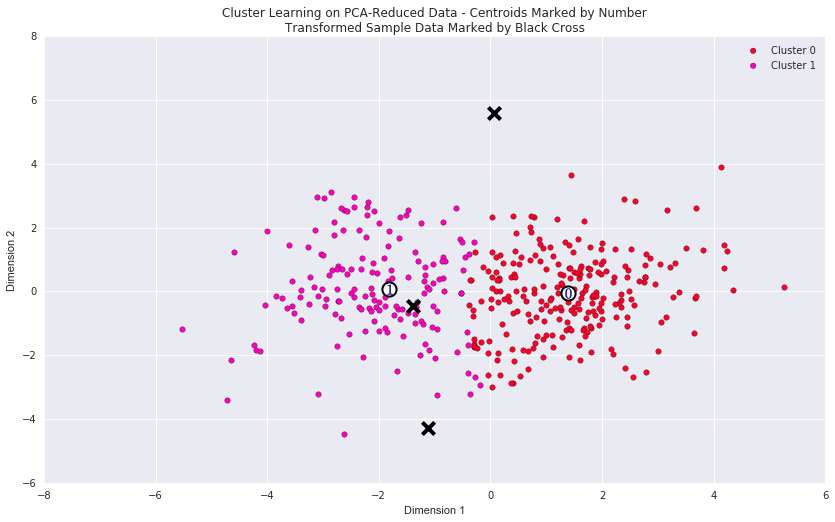

In [170]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer_gmm = GMM(n_components=2, random_state = 0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds_gmm = clusterer_gmm.predict(reduced_data)


# TODO: Find the cluster centers
centers_gmm = clusterer_gmm.means_


# TODO: Predict the cluster for each transformed sample data point
sample_preds_gmm = clusterer_gmm.predict(pca_samples)


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_gmm[i] = silhouette_score(reduced_data, preds_gmm, metric='euclidean')

preds = preds_gmm
centers = centers_gmm
sample_preds = sample_preds_gmm

# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [171]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)


# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

print "Data broken into quintiles:"
display(data.quantile([0.25,0.5,0.75,1.0]).round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


Data broken into quintiles:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0.25,3128.0,1533.0,2153.0,742.0,257.0,408.0
0.50,8504.0,3627.0,4756.0,1526.0,816.0,966.0
0.75,16934.0,7190.0,10656.0,3554.0,3922.0,1820.0
1.00,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**  As before we again show the data divided in quintiles. From this we can see that Segment 0 customer falls between the 25 % and 50% percentile in general and is usually closer to 25% percentile. Segment 1 customer falls around 75% percentile in general. It is usually between 50% and 75%.

Thus points below the 50% percentile are usually assigned to Segment 0 (Cluster 0) and points above the 50% percentile are usually assigned to Segment 1 (Cluster 1)

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,32717,16784,13626,60869,1272,5609
1,3,2920,6252,440,223,709
2,16448,6243,6360,824,2662,2005


Cluster prediction for each sample for each feature:


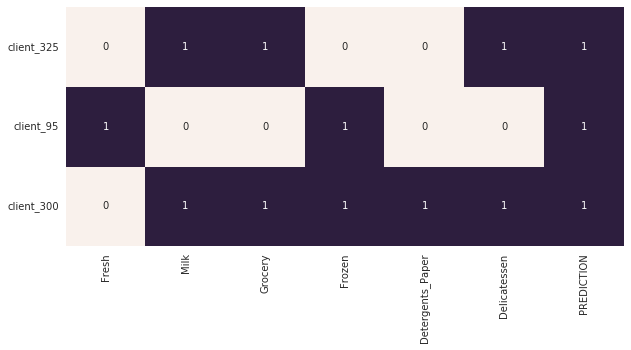

In [172]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
print "\n\nChosen samples of wholesale customers dataset:"
display(samples)


import seaborn as sns
import matplotlib.pyplot as plt

# check if sample's spending is closer to segment 0 or 1
samples = samples.reset_index(drop = True)
df_diff = (np.abs(samples - true_centers.iloc[0]) < np.abs(samples - true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

#add predictions to df
df_final = pd.concat([df_diff, pd.Series(sample_preds, name = 'PREDICTION')], axis = 1)

#visualise results
fig, ax = plt.subplots(1,1, figsize = (10,6))

print "Cluster prediction for each sample for each feature:"

sns.heatmap(df_final, annot = True, cbar = False, square = True, yticklabels = ['client_{0}'.format(i) for i in indices])
plt.xticks(rotation = 90)
plt.yticks(rotation = 0);

**Answer:** All the three points are predicted by the algorithm to be in cluster 1 (same cluster). The third sample clearly should be in Cluster 1 and a case could be made for the the first sample to be in Cluster 1 as well. However the second sample seems to be miscategorized and should have been in cluster 0 (since the quantities are small and seem to be less than the 50% percentile.)

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:** If the wholesale distributor wanted to make some changes to its delivery service schedule, it should try to find a representative sample of the population and see how it affects them. Our analysis shows that there are two clusters in our data, thus it should try to pick an equal number of sample points from each cluster. This will ensure that the sample is representaitive of the population and not concentrated from points from one cluster. In the ideal situation we get 50% points from each cluster in each of the tests. We assume that preferences for each customer can be recorded (either through survey or some other means) at the individual level.



| A Test(Original Schedule)                         | B Test(new Schedule)                 | 
| :-----------                                      | :----------                          | 
| Half population of each of Cluster0 and Cluster1  | Half population of each of Cluster0 and Cluster1         |	


From this test we can find out how each half of the customer base in cluster0 and cluster1 respectively likes the two different schedules and then we can determine if this difference is statistically significant. ** Note the ASSUMPTION we made in this test setup was that we could measure the preference between the two schedules at individual customer level and we know which customer falls in which cluster (both are reasonable assumptions) **

** If we cannot measure the preference at individual levels ** then we will need to conduct the test in two different time periods (** again ASSUMPTION would be that preferences do not change over time **)


| time | A Test(Original Schedule)                                         | B Test(new Schedule)                 | 
| :-- | :-----------                                                      | :----------                          |
| t0  | Half population of Cluster0 (h0c0) + Full population of Cluster1  | Half population of each of Cluster0 (h1c0)   |
| t1  | Half population of Cluster0 (h0c0)   | Half population of each of Cluster0 (h1c0) + Full population of Cluster1 |

Now we can compare the A-test in time t1 with the B-test in time t0 to find the preference differences for Cluster0 and see if it is statistically significant. Next we can compare A-test from time t0 and B-test from time t1 and using data for Cluster0 calculated earlier we can find preference differences for Cluster1 and see if they are statistically significant.







### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:** The clustering algorithm has allowed the wholesale distributor to learn a new feature/label for each customer based on which cluster they are assigned. As shown later one of the clusters is Hotel and the other is Retail. The distributor can use these labels for supervised learning to create a classification tree which it can then later use to learn about any new customers it gets for its distribution networks. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

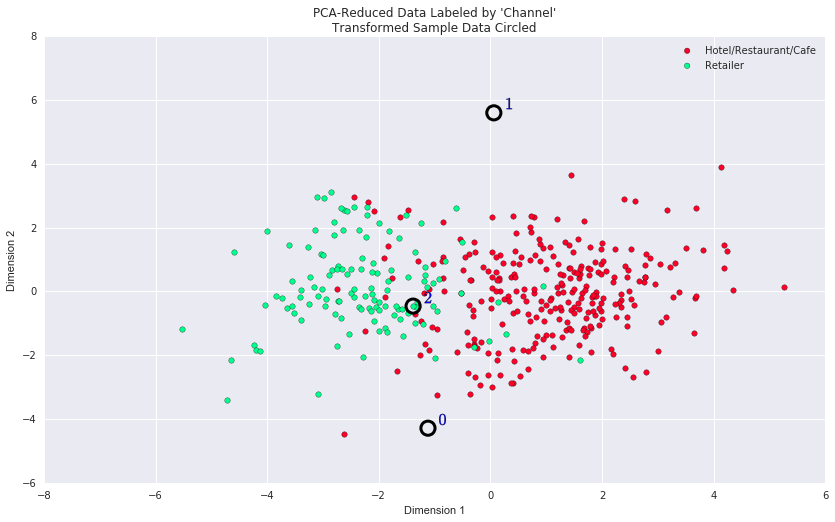

In [173]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The number of clusters we have chosen compares exactly to this underlying distribution (Hotel/Restaurant/Cafe customers Vs Retailer customers.) We chose 2 clusters becuase that was providing the largest silhouette coefficient and it seems that is what this graph shows as well. However at the beginning of the exercise we chose three samples assuming there were three different size groups in the data. Our data points do show large variance but unfortunately got assigned to the same cluster (and hence lacked cluster diviersity). Thus these definitions are not consistent with the customer segements assumptions that we started out with.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.